In [1]:
import pandas as pd
from ord_data_load import is_reaction_of_type
from rdkit.Chem.AllChem import ReactionFromSmarts
from ord_data_load import draw_reaction_rand
from ord_data_load import ORD_PATH, ORD_REPO_PATH

#to disable warnings
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')

In [2]:
pd_df = pd.read_pickle(f'{ORD_PATH}/pd_df.pkl')

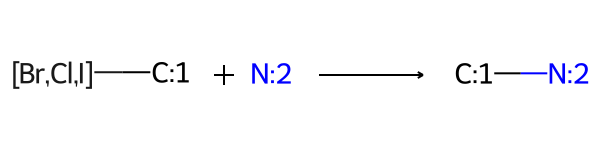

In [3]:
BUCHWALD_RXN_SMARTS = "[c:1]-[Br,Cl,I].[NX3:2]>>[c:1]-[NX3:2]"
rxn_pattern = ReactionFromSmarts(BUCHWALD_RXN_SMARTS)
rxn_pattern

In [4]:
%%time
mask = pd_df['reaction_smile'].apply(is_reaction_of_type, reaction_type_pattern=rxn_pattern)
df_buchwald = pd_df[mask].copy()
len(df_buchwald)

CPU times: total: 1min 57s
Wall time: 1min 57s


8854

In [62]:
import dask.dataframe as dd
from dask.diagnostics import ProgressBar
ProgressBar().register()

dds = dd.from_pandas(pd_df['reaction_smile'], npartitions=240)
mask = dds.apply(is_reaction_of_type,
                 reaction_type_pattern=rxn_pattern,
                 meta=pd.Series(dtype=bool)).compute(scheduler='threads')
df_buchwald = pd_df[mask].copy()
len(df_buchwald)

[########################################] | 100% Completed | 138.80 s
[########################################] | 100% Completed | 138.90 s
[########################################] | 100% Completed | 139.00 s


8854

Reaction: 237
Solvent: [['toluene', 'C1(=CC=CC=C1)C']]
Catalyst [['Pd2(dba)3', 'C=1C=CC(=CC1)/C=C/C(=O)/C=C/C2=CC=CC=C2.C=1C=CC(=CC1)/C=C/C(=O)/C=C/C2=CC=CC=C2.C=1C=CC(=CC1)/C=C/C(=O)/C=C/C2=CC=CC=C2.[Pd].[Pd]']]


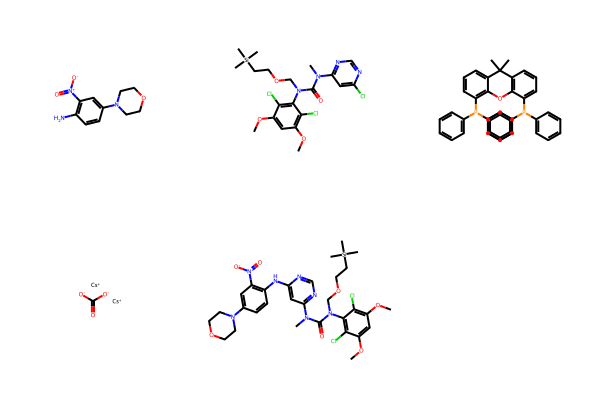

A degassed mixture of 4-morpholin-4-yl-2-nitro-phenylamine (290 g, 1.3 mmol), 1-(6-chloro-pyrimidin-4-yl)-3-(2,6-dichloro-3,5-dimethoxy-phenyl)-1-methyl-3-(2-trimethylsilanyl-ethoxymethyl)-urea (Procedure 2E, step b; 624 g, 1.2 mmol), Pd2(dba)3 (110 g, 0.12 mmol), Xantphos (139 g, 0.24 mmol) and Cs2CO3 (782 g, 2.4 mmol) in toluene (15 mL) was heated at 100° C. for 2.5 hours. The reaction was concentrated, and the residue was purified by chromatography flash on silica to obtain the title compound (440 mg, yield: 49%) as a red solid. MS (ESI): 708 [M+H]+.


In [8]:
draw_reaction_rand(df_buchwald)